In [1]:
import pandas as pd

df = pd.read_pickle("merged_all_table.pkl", compression='bz2')

In [2]:
df.columns

Index(['match_api_id', 'home_team_api_id', 'away_team_api_id', 'goal',
       'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner',
       'possession', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH',
       'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD',
       'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA',
       'BSH', 'BSD', 'BSA', 'league_name', 'country_name', 'team_api_id',
       'team_long_name', 'team_short_name', 'team_overall_score',
       'home_total_goal', 'away_total_goal', 'home_players_avg_overall_rating',
       'home_players_avg_overall_score', 'home_players_avg_ideal_body_rate',
       'away_players_avg_overall_rating', 'away_players_avg_overall_score',
       'away_players_avg_ideal_body_rate', 'home_total_win',
       'home_total_loose', 'home_total_draw', 'away_total_win',
       'away_total_loose', 'away_total_draw', 'league_home_total_win',
       'league_home_total_loose', 'league_home_total_draw',
 

In [3]:
import seaborn as sns

In [4]:
df.head()

match_api_id  home_team_api_id  away_team_api_id  goal shoton shotoff  \
0        492473              9987              9993  None   None    None   
1        665353              9987              9993  None   None    None   
2        838476              9987              9993  None   None    None   
3       1032694              9987              9993  None   None    None   
4       1224064              9987              9993  None   None    None   

  foulcommit  card cross corner  ... away_total_win  away_total_loose  \
0       None  None  None   None  ...             10                49   
1       None  None  None   None  ...             10                49   
2       None  None  None   None  ...             10                49   
3       None  None  None   None  ...             10                49   
4       None  None  None   None  ...             10                49   

   away_total_draw  league_home_total_win  league_home_total_loose  \
0               17                     61                       20   
1               17                     61                       20   
2               17                     61                       20   
3               17                     61                       20   
4               17                     61                       20   

   league_home_total_draw  league_away_total_win  league_away_total_loose  \
0                      25                     10                       49   
1                      25                     10                       49   
2                      25                     10                       49   
3                      25                     10                       49   
4                      25                     10                       49   

   league_away_total_draw   target  
0                      17     Draw  
1                      17     Draw  
2                      17  HomeWin  
3                      17  HomeWin  
4                      17  HomeWin  

[5 rows x 68 columns]

c:\Users\medas\OneDrive\Desktop\Data Science management\Football-Prediction\.venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


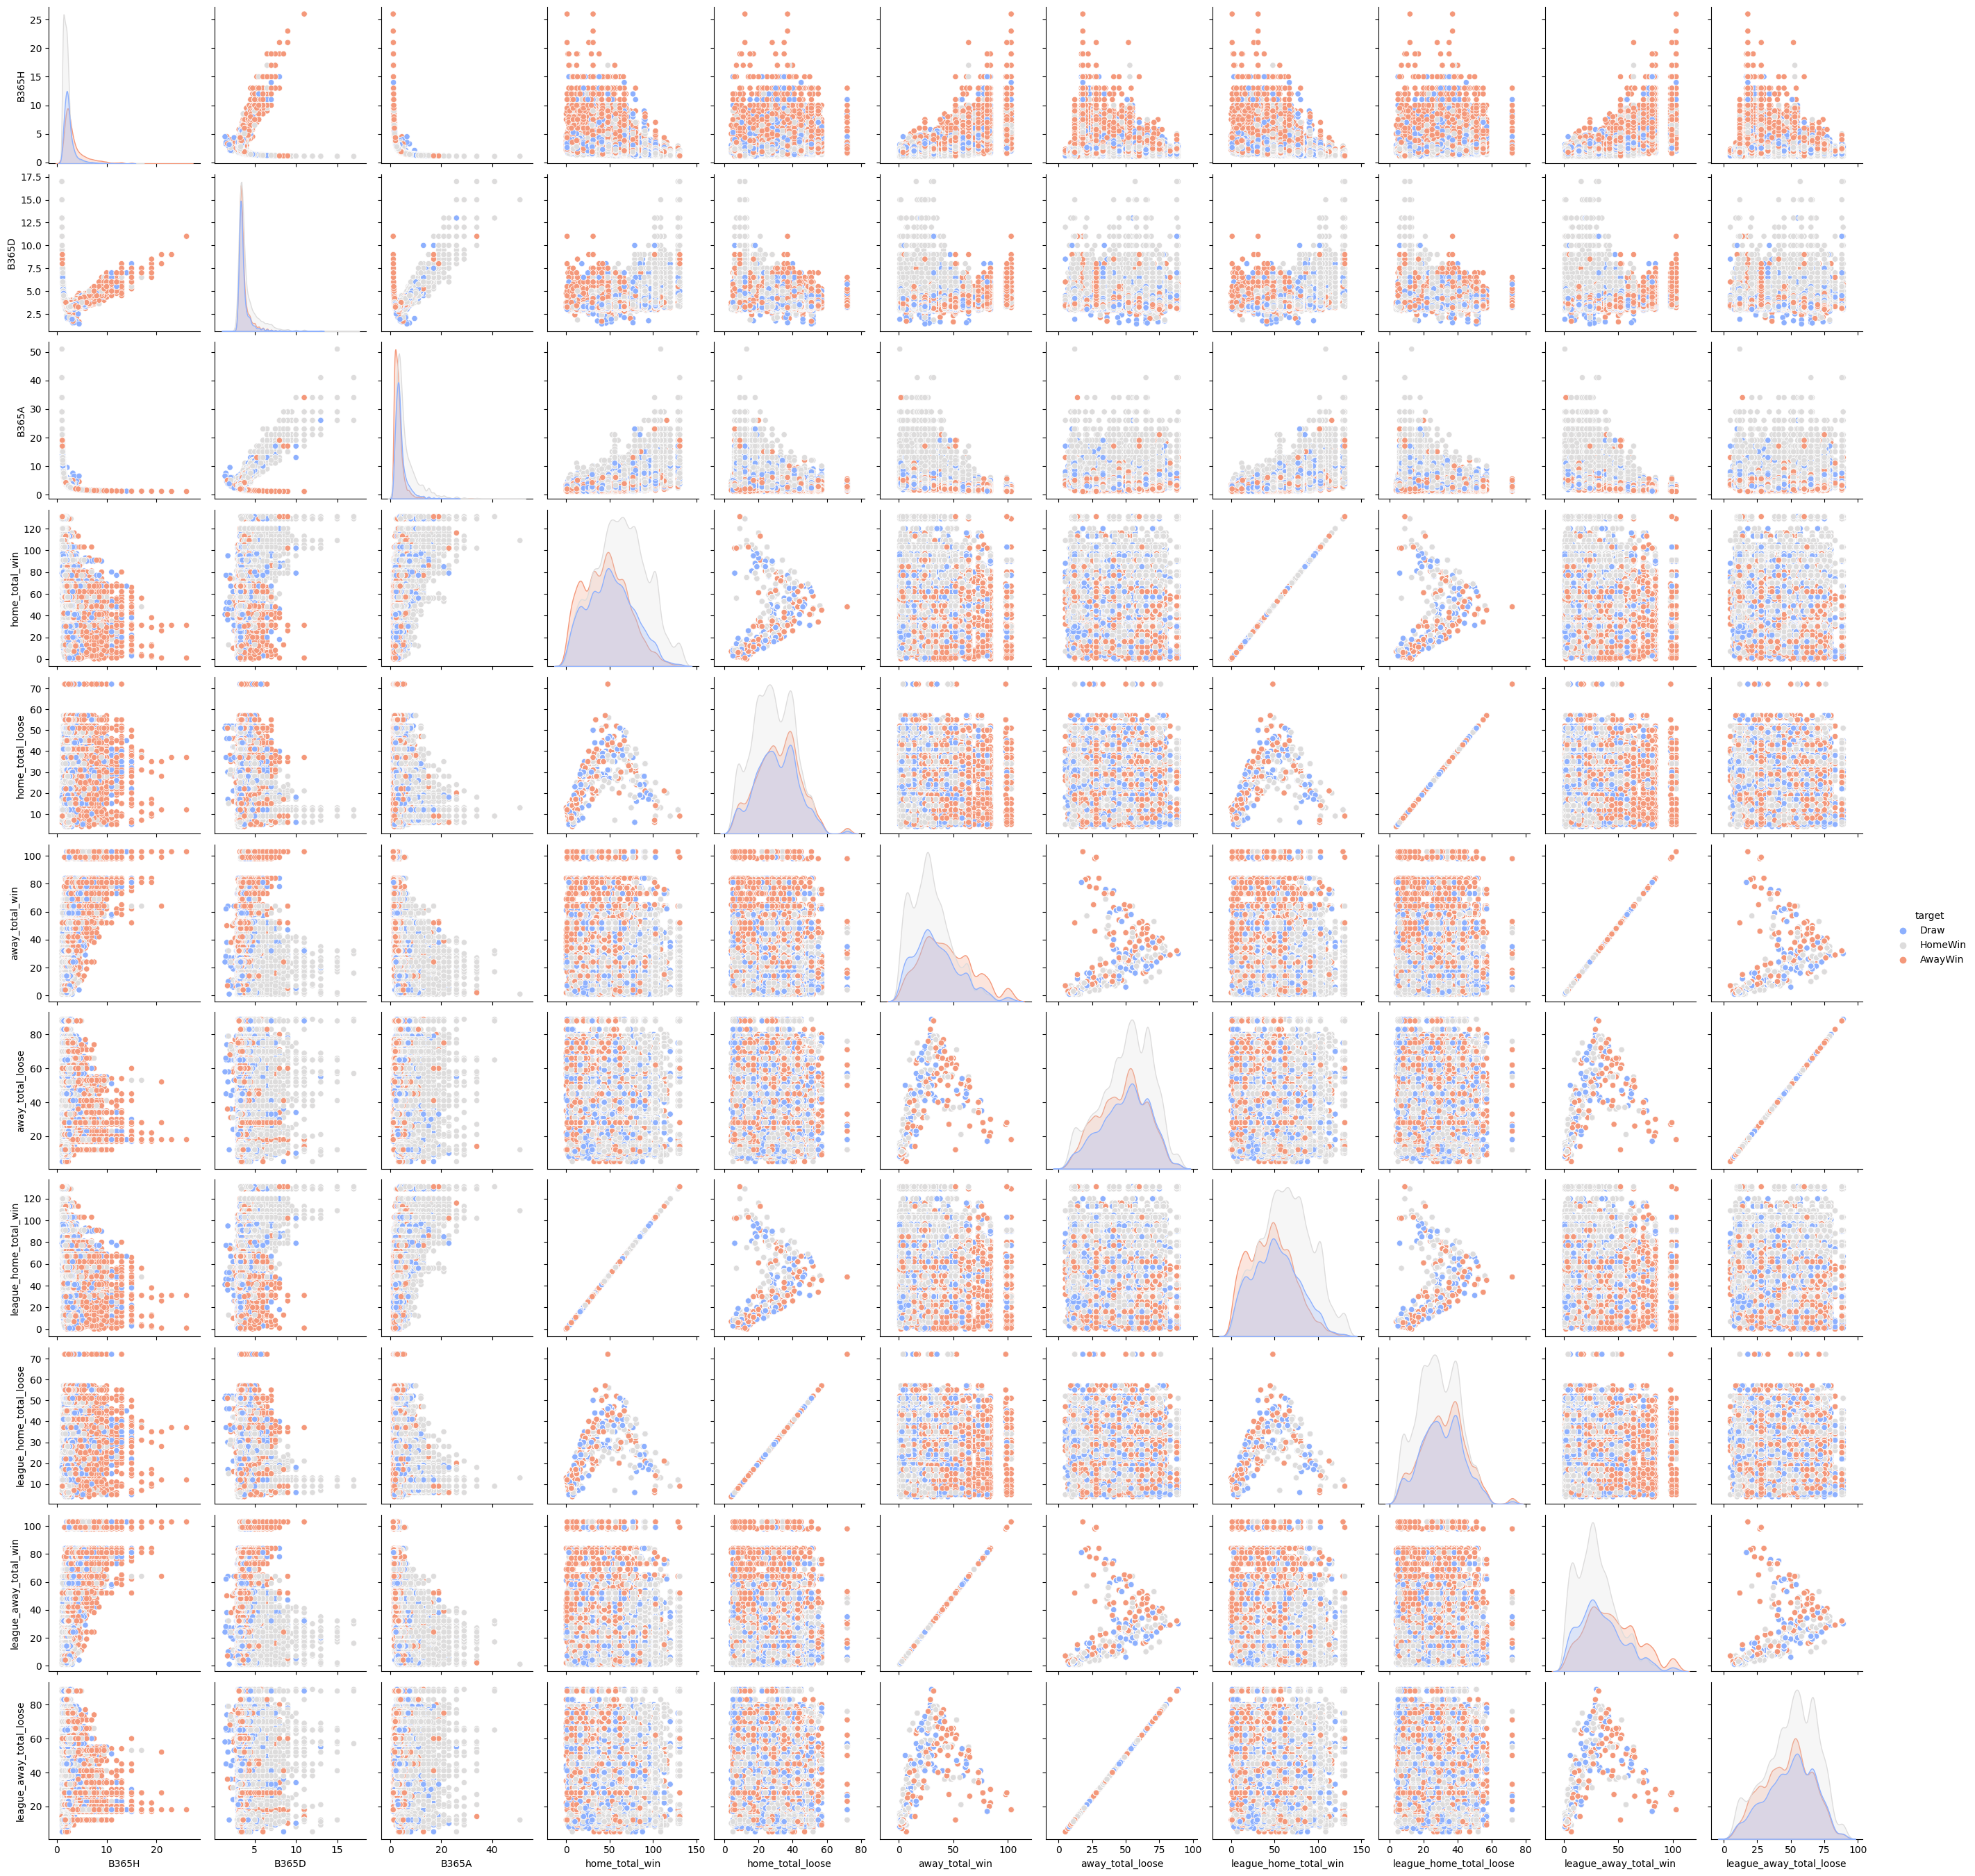

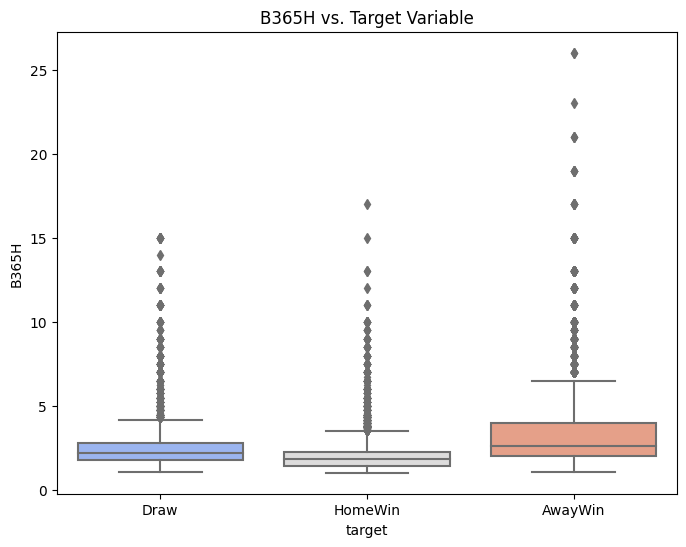

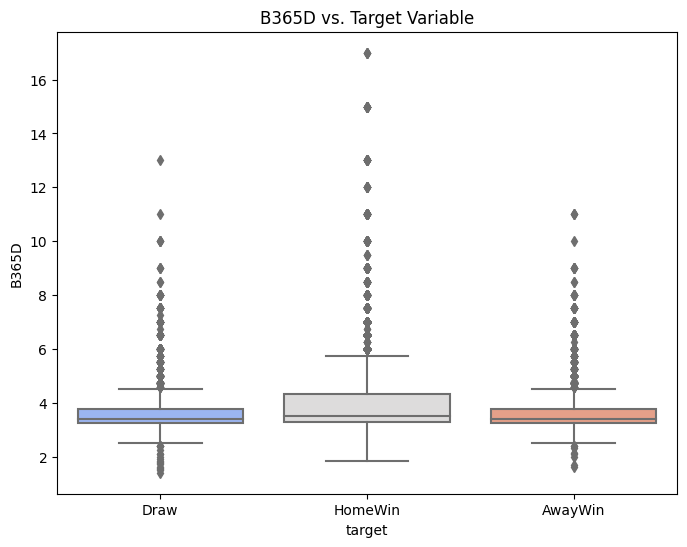

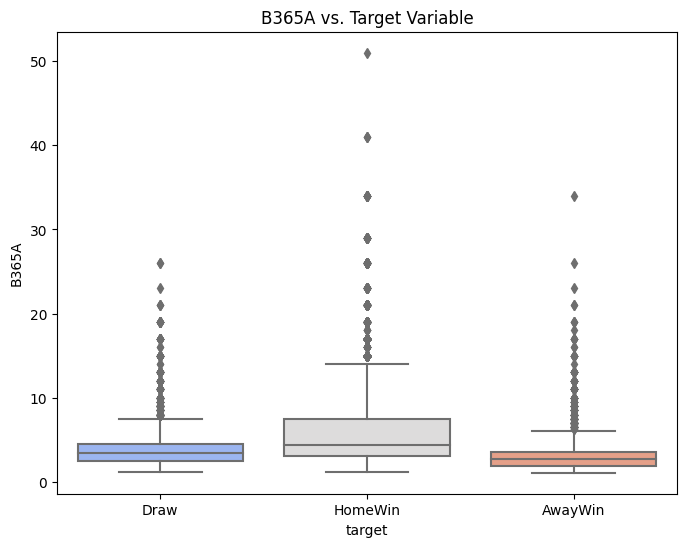

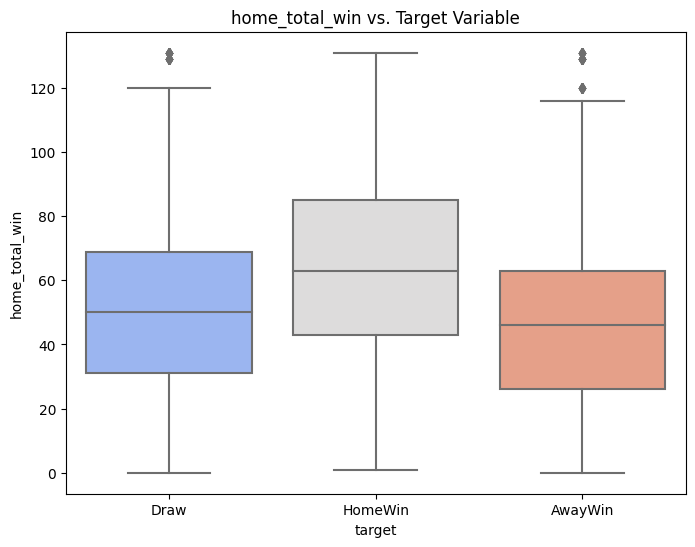

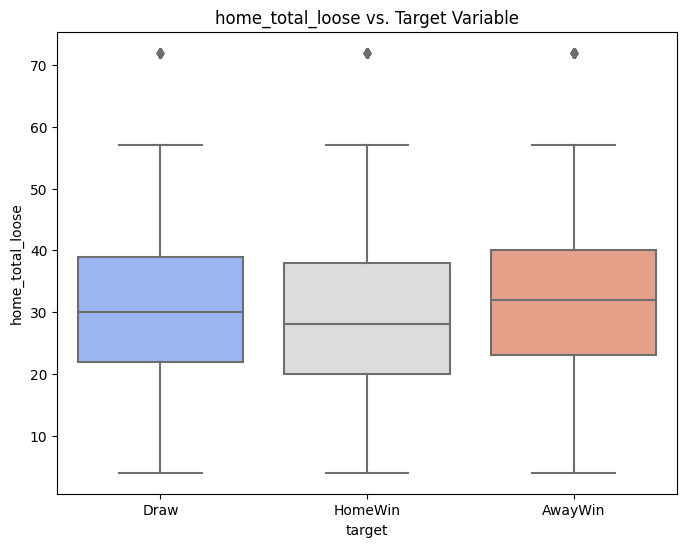

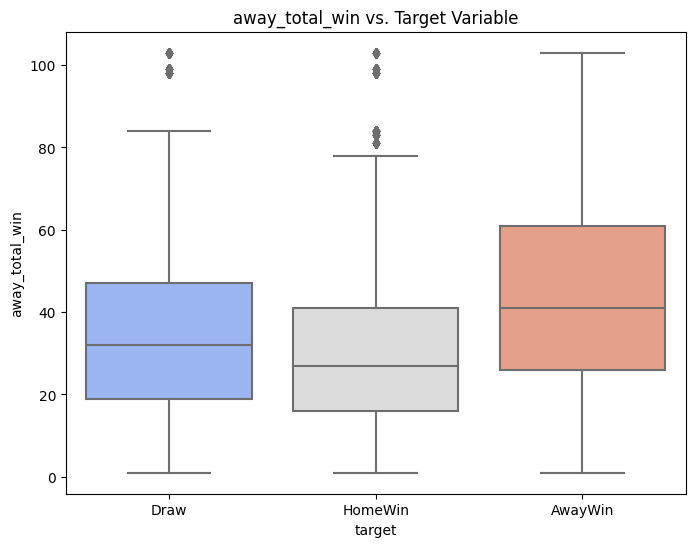

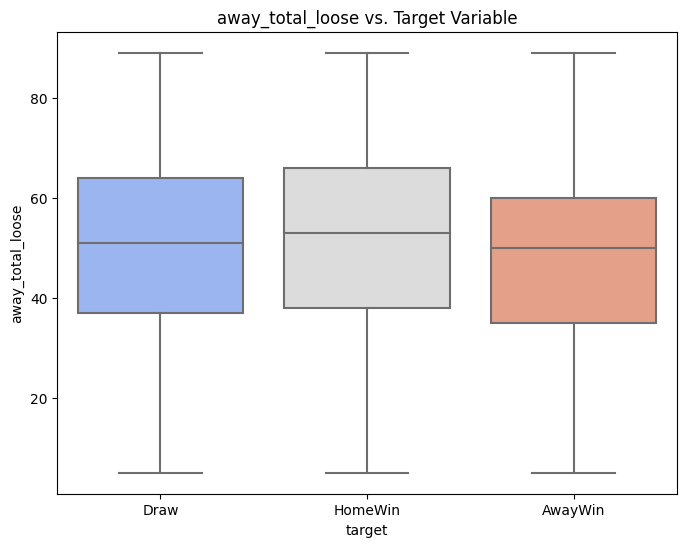

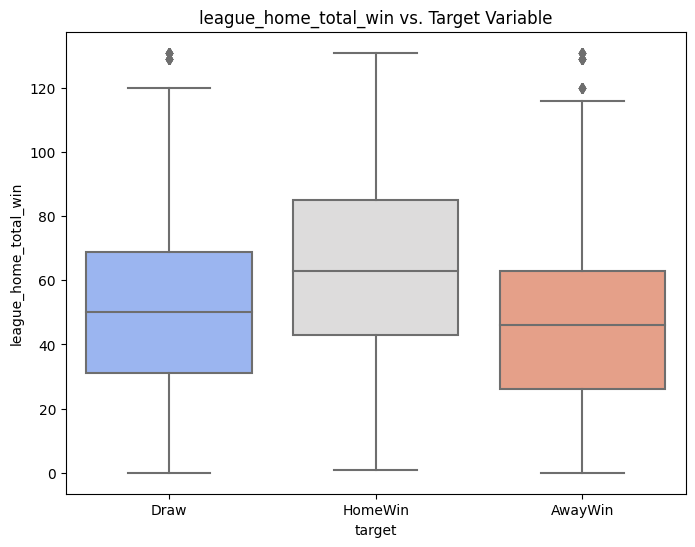

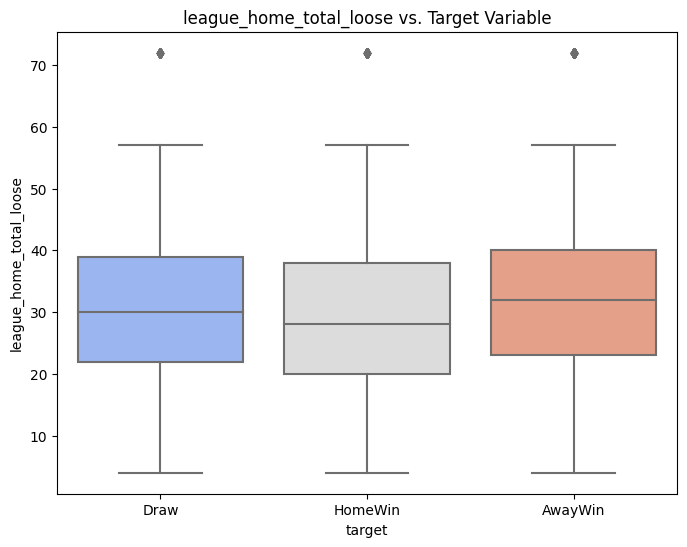

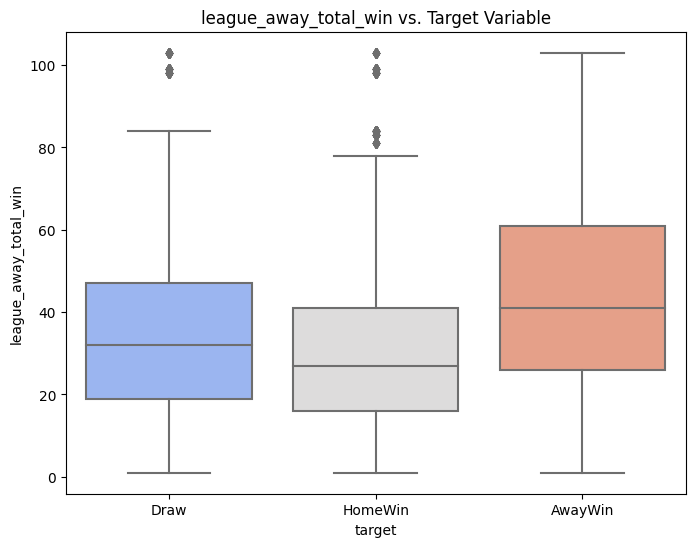

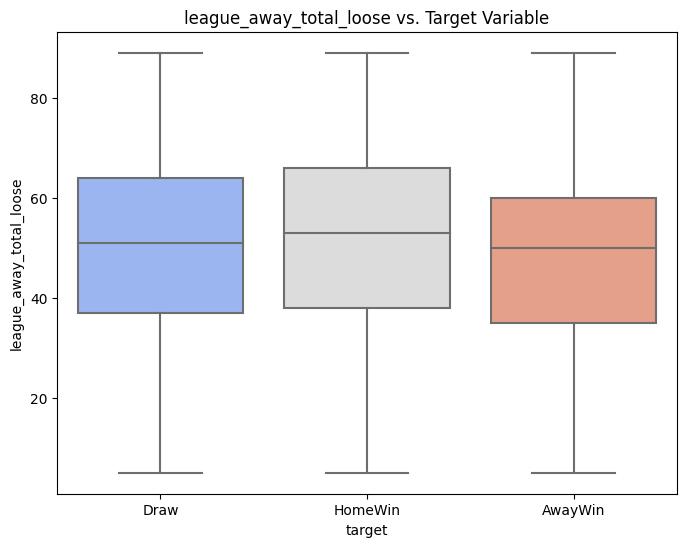

In [5]:
import matplotlib.pyplot as plt

# Select the columns of interest
columns_of_interest = ['B365H', 'B365D', 'B365A', 'home_total_win', 'home_total_loose',
                       'away_total_win', 'away_total_loose', 'league_home_total_win',
                       'league_home_total_loose', 'league_away_total_win', 'league_away_total_loose', 'target']

# Create a DataFrame with the selected columns
selected_df = df[columns_of_interest]

# Pairplot to visualize pairwise relationships between numeric columns and target variable
sns.pairplot(selected_df, hue='target', diag_kind='kde', palette='coolwarm')
plt.show()

# Boxplot to understand the distribution of numeric columns for each target class
numeric_columns = ['B365H', 'B365D', 'B365A', 'home_total_win', 'home_total_loose',
                   'away_total_win', 'away_total_loose', 'league_home_total_win',
                   'league_home_total_loose', 'league_away_total_win', 'league_away_total_loose']

for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='target', y=column, data=selected_df, palette='coolwarm')
    plt.title(f'{column} vs. Target Variable')
    plt.show()

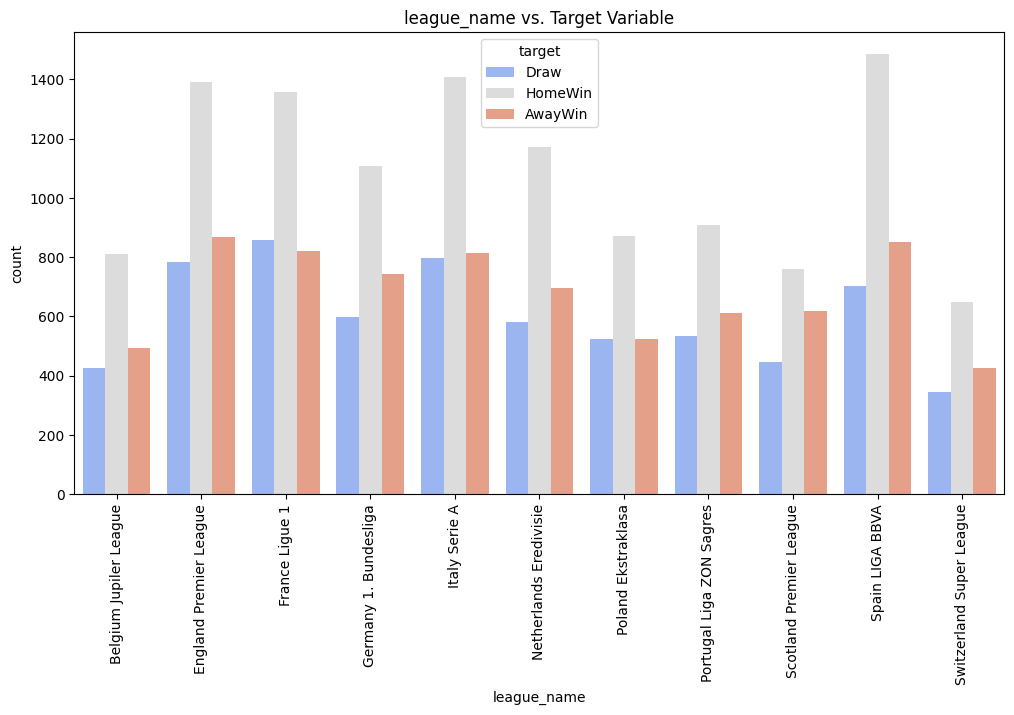

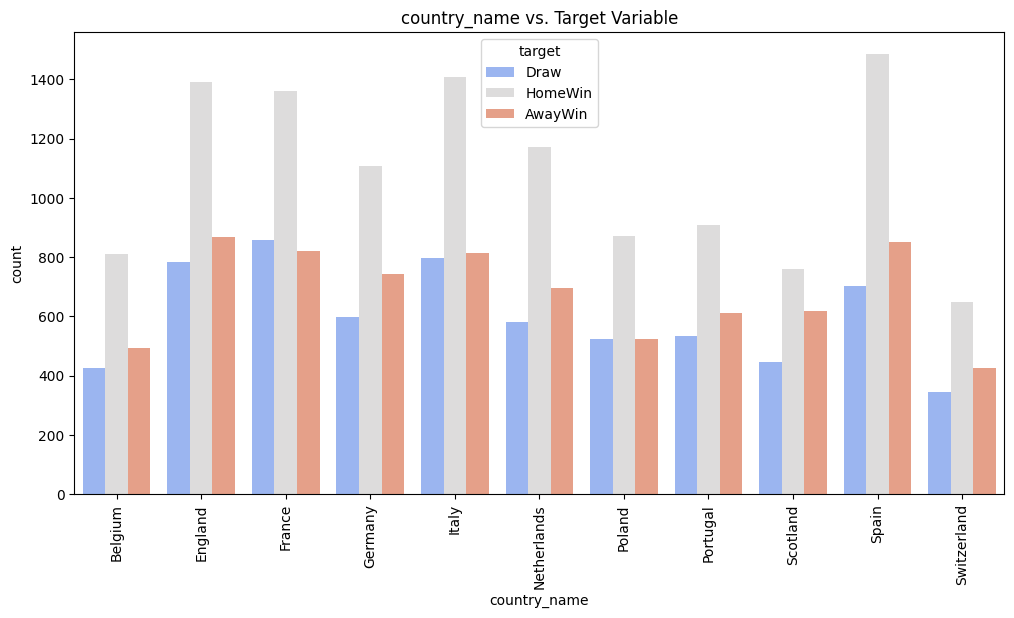

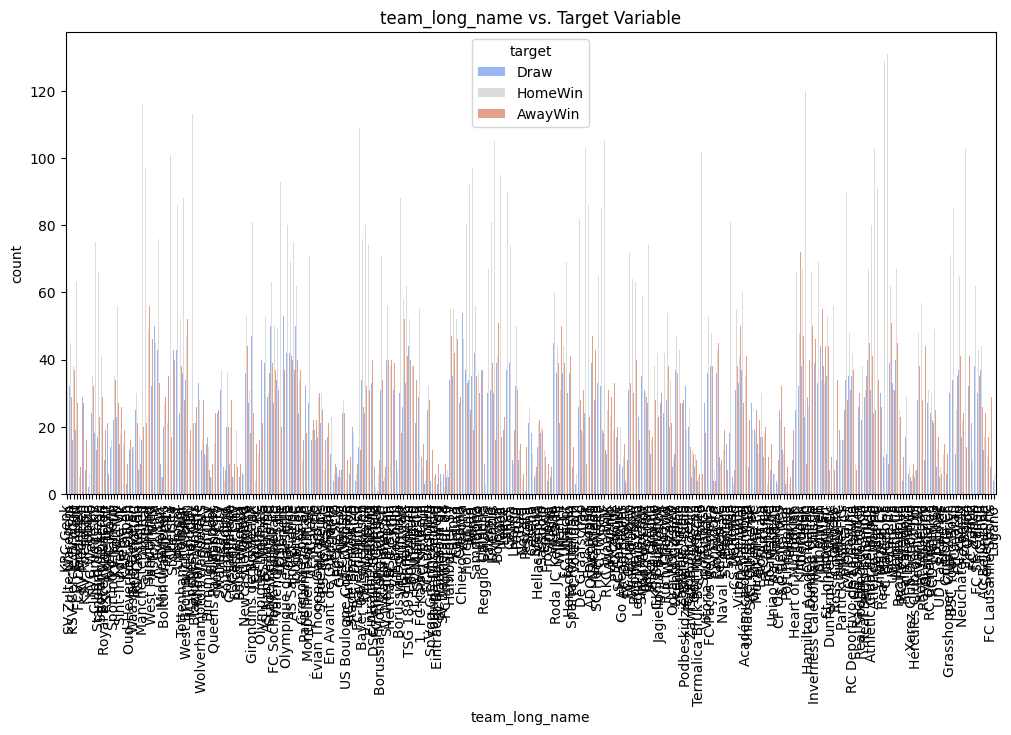

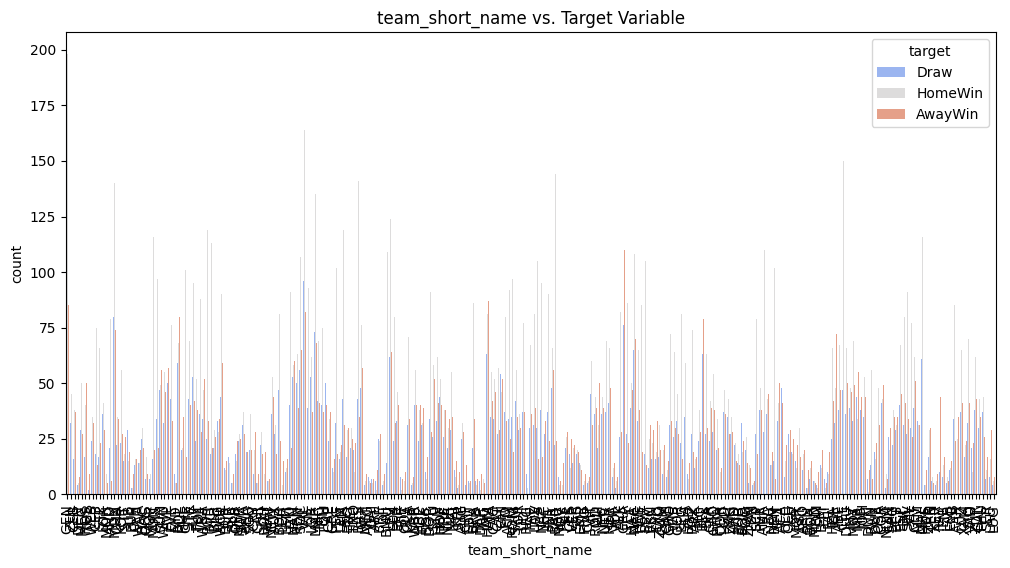

In [6]:
# Select the columns of interest
columns_of_interest = ['league_name', 'country_name', 'team_long_name', 'team_short_name', 'target']

# Create a DataFrame with the selected columns
selected_df = df[columns_of_interest]

# Countplot to understand the distribution of categorical columns for each target class
categorical_columns = ['league_name', 'country_name', 'team_long_name', 'team_short_name']

for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=column, hue='target', data=selected_df, palette='coolwarm')
    plt.title(f'{column} vs. Target Variable')
    plt.xticks(rotation=90)
    plt.show()

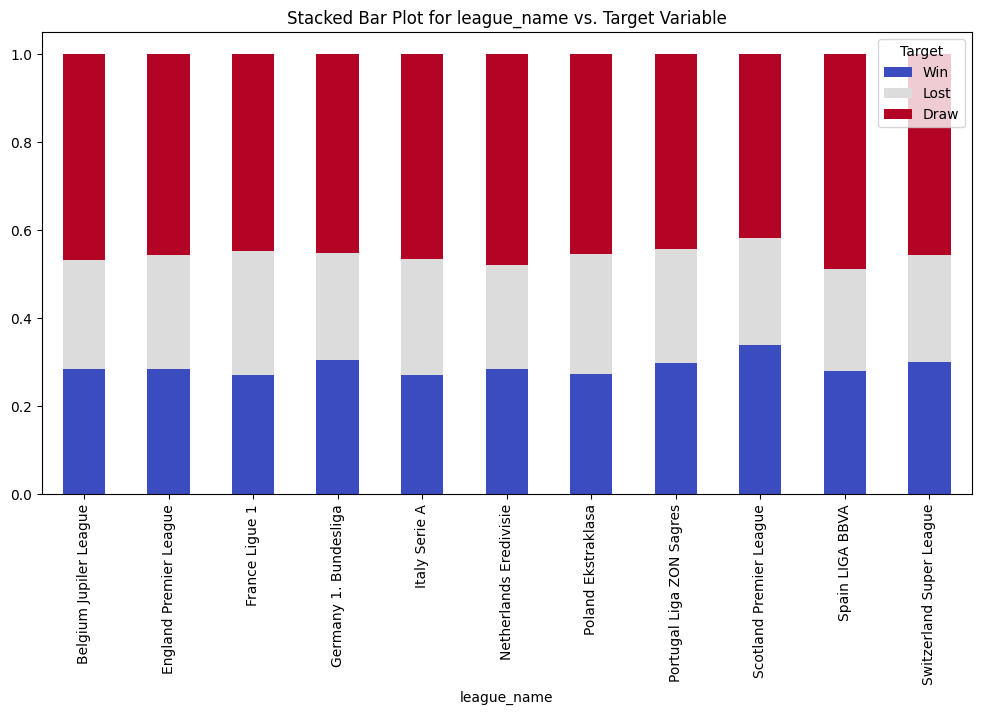

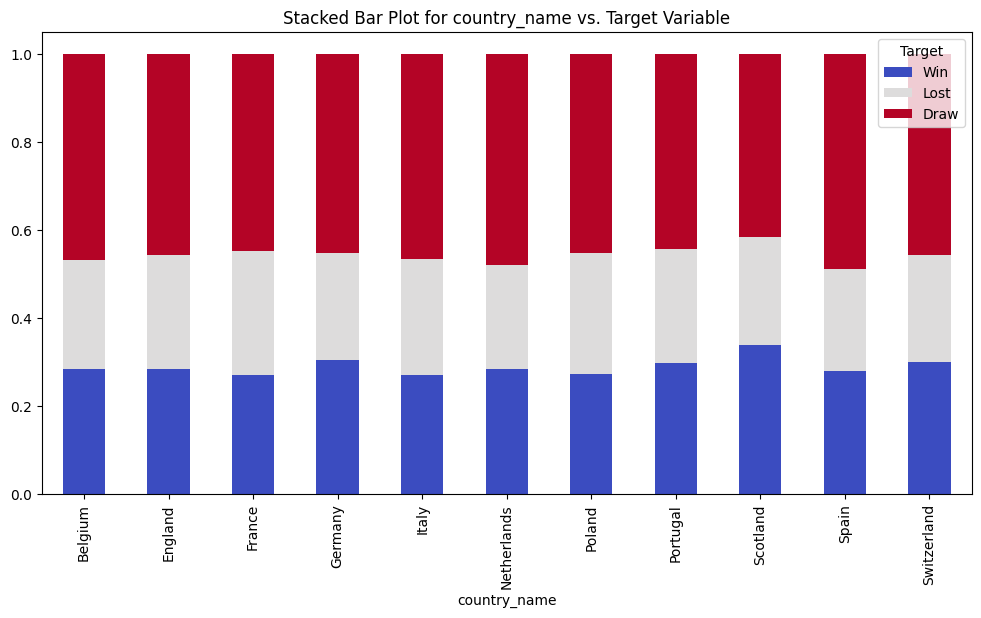

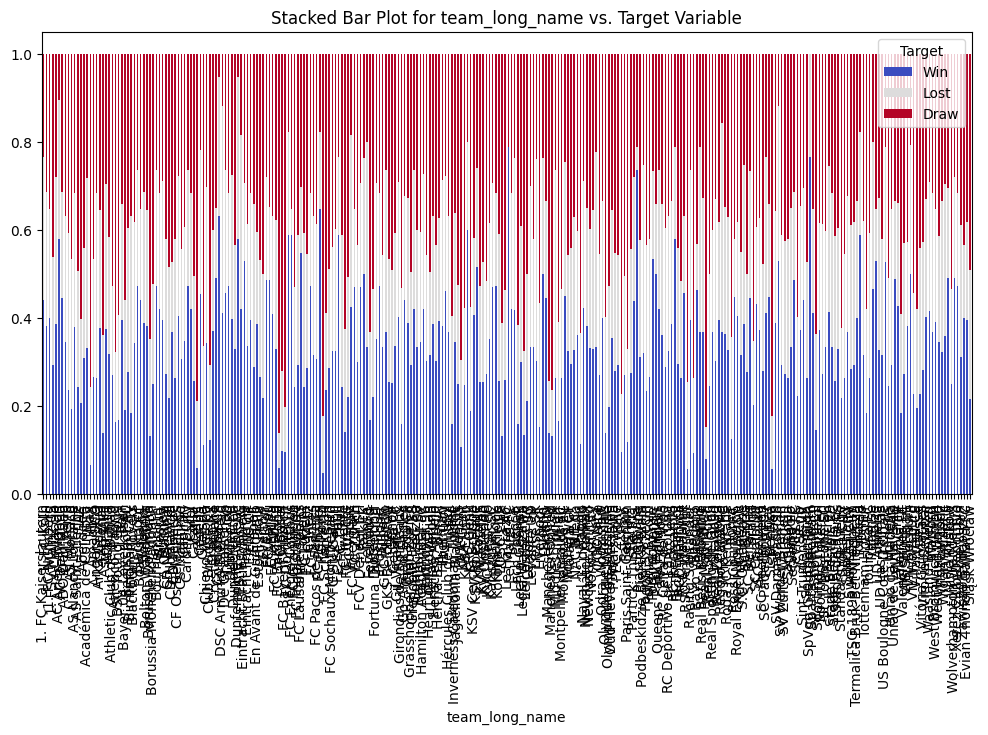

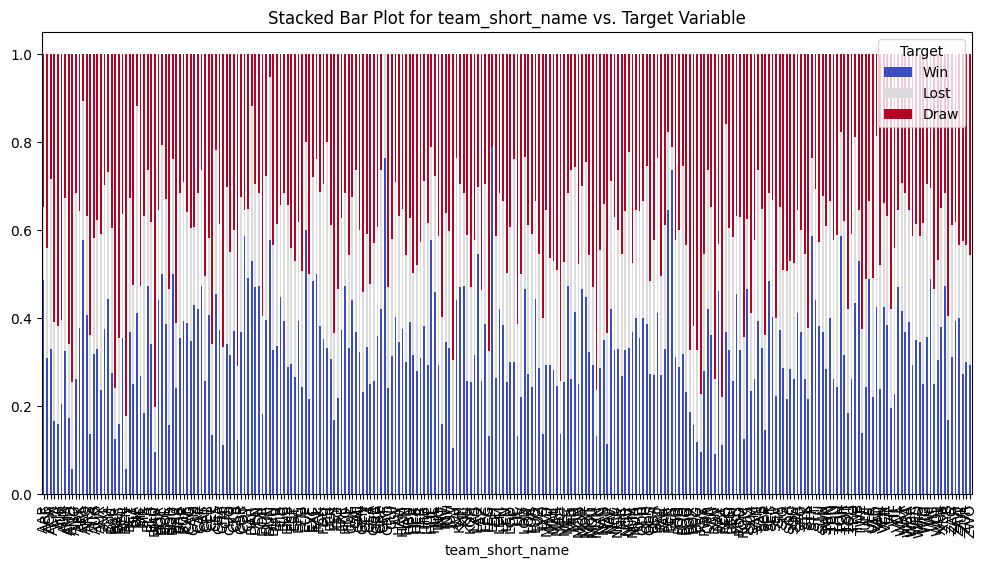

In [7]:
# Stacked bar plot to see the proportion of each category in the different target classes
for column in categorical_columns:
    crosstab_df = pd.crosstab(selected_df[column], selected_df['target'], normalize='index')
    crosstab_df.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
    plt.title(f'Stacked Bar Plot for {column} vs. Target Variable')
    plt.xticks(rotation=90)
    plt.legend(title='Target', loc='upper right', labels=['Win', 'Lost', 'Draw'])
    plt.show()